# Final Project B; Water Company

#  classification water quality for public consumption

**Bussiness Problem**

Water quality changes because it is affected by many factors including weather, climate, rainfall, industrial and sewage discharges,example,when water gets a lot of heat intensity from sunlight, the pH will rise and the water is alkaline.But when temperatures are cold, the pH of the water will drop and the water will be acidic.

Every month, our company must prepare a team to check the quality of the water before it is produced and marketed to consumers. Therefore, the company wants to find a more efficient way to solve this problem.

Therefore, data sciencetist conducted water quality modeling and prediction for water pollution control.




## Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer 
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import Pipeline

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, roc_curve, roc_auc_score, average_precision_score

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [ ]:
print(df.shape)


(3276, 10)


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## EDA

### Data Distribution

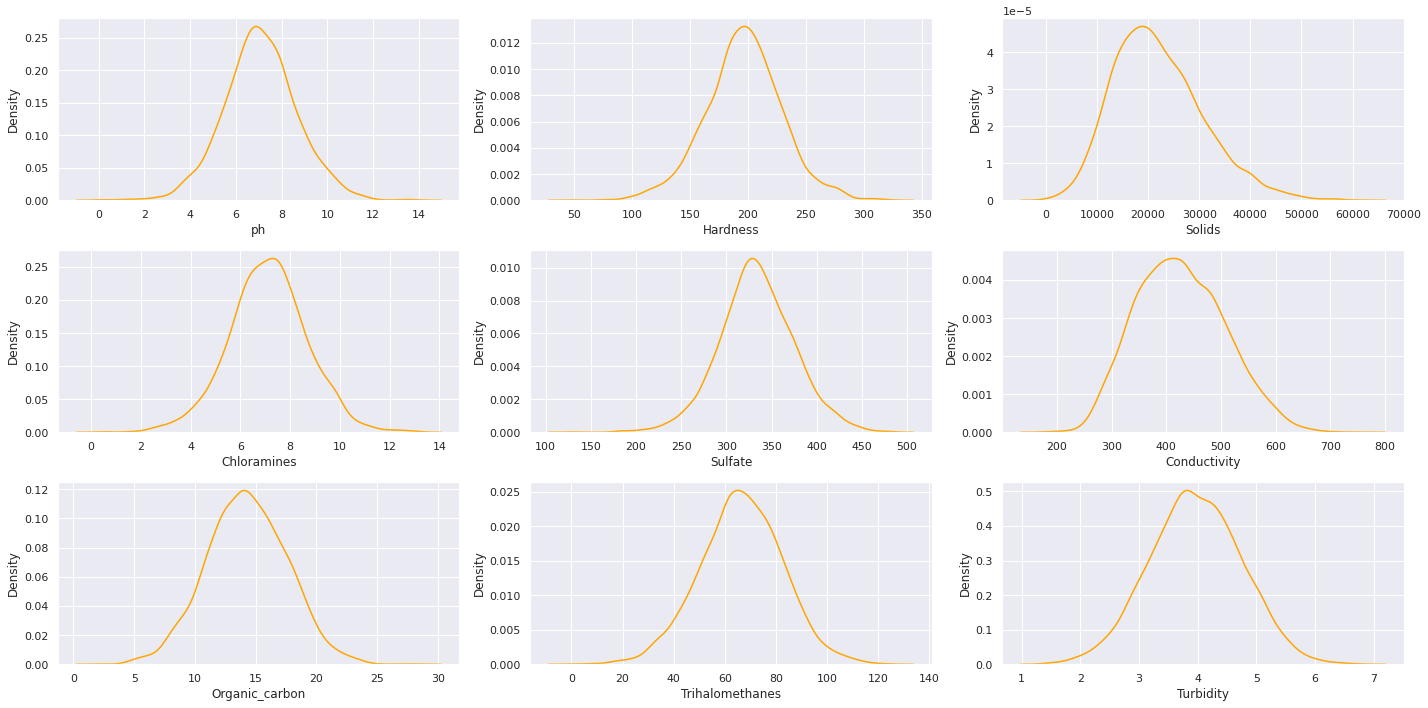

In [ ]:
nums_water = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity' ]
plt.figure(figsize=(20,10))
for i in range(0, len(nums_water)):
    plt.subplot(3, len(nums_water)/3, i+1)
    sns.distplot(df[nums_water[i]], color='orange', hist = False)
    plt.tight_layout()

### Correlation

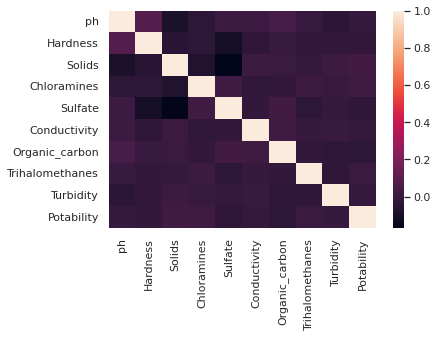

In [ ]:
sns.heatmap(df.corr())

### pH

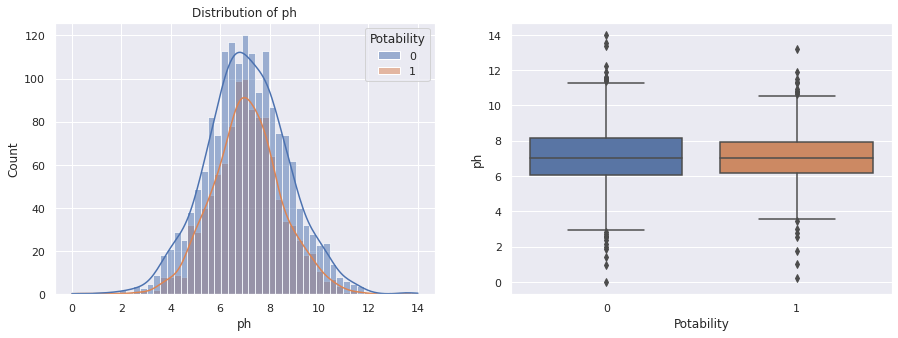

In [ ]:
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plot = sns.histplot(
    data=df,
    x='ph',
    hue ='Potability',
    kde=True
).set_title('Distribution of ph')

f.add_subplot(1,2,2)
sns.boxplot(x='Potability', y='ph', data=df, showfliers=True)
plt.show()

#### ECDF plot of pH
An ECDF represents the proportion or count of observations falling below each unique value in a dataset.

<Figure size 1080x360 with 0 Axes>

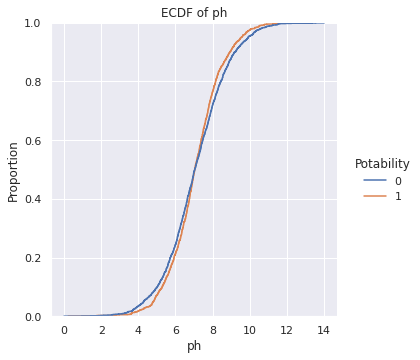

In [ ]:
f = plt.figure(figsize=(15,5))
sns.displot(
    data=df, x="ph", hue="Potability",
    kind="ecdf"
)
plt.title('ECDF of ph')
plt.show()

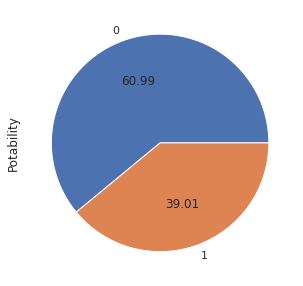

In [ ]:
#proportion of Potability values
plt.figure(figsize=(15,5))

df['Potability'].value_counts().plot.pie(autopct='%.2f')
plt.show()

In [ ]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

**insight** :
1. *variable ph has a normal distribution with  outliers*
2. *ECDF plot can provide us with some summary statistics about ph water :* 
        - 50% ph water in our data is Acidic water (ph : <7)
        - around 50% ph water in our data is Pure water (ph : 7)
        - 20% is Alkaline (ph =>8)
3. *Most of water quality in our data are non potability*


### Hardness

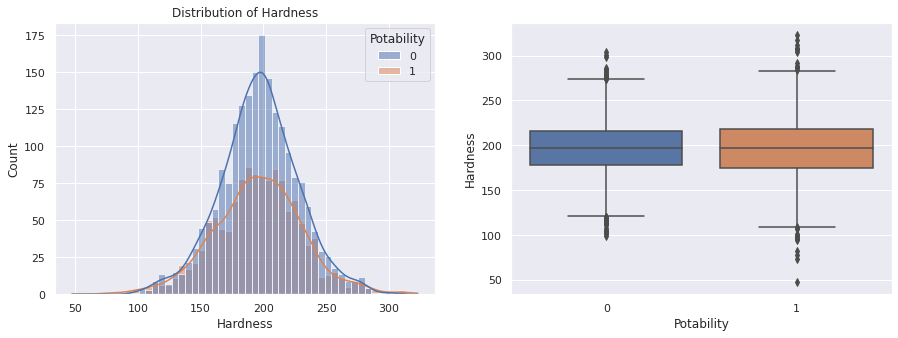

In [ ]:
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plot = sns.histplot(
    data=df,
    x='Hardness',
    hue ='Potability',
    kde=True
).set_title('Distribution of Hardness')

f.add_subplot(1,2,2)
sns.boxplot(x='Potability', y='Hardness', data=df, showfliers=True)
plt.show()

#### Classification of Water by Hardness 

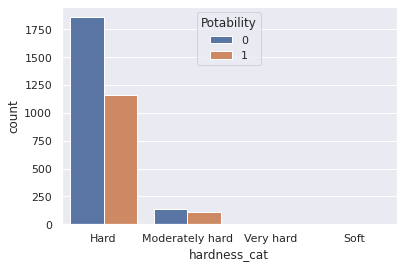

In [ ]:
conditions = [
    (df['Hardness'] < 75.00),
    (df['Hardness'] >= 75.00) & (df['Hardness'] < 150.00),
    (df['Hardness'] >= 150.00) & (df['Hardness'] <= 300.00),
    (df['Hardness'] > 300.00)
    ]

values = ['Soft', 'Moderately hard', 'Hard', 'Very hard']

df['hardness_cat'] = np.select(conditions, values)

sns.countplot(x='hardness_cat', hue = 'Potability', data=df)


**Insight** :

1. *Hardness has a normal distribution with outliers*
2. *At the bar plot,notice that our data are mostly **hard** and **Moderately hard** (above 300 mg/L CaCO3) its mean that the water is good but it must also be removed before certain industries can use the water.*
    

### Solids (Total dissolved solids - TDS)

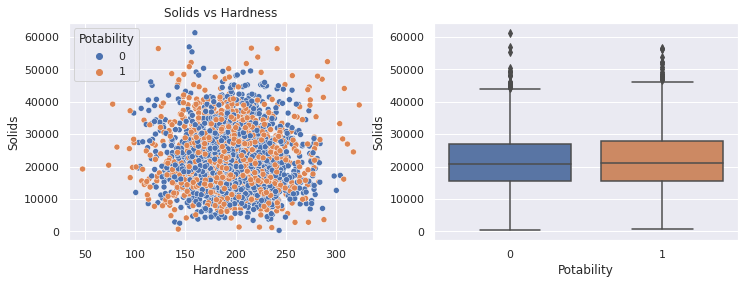

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.scatterplot(
    data=df,
    x='Hardness', y='Solids', hue='Potability'
).set_title('Solids vs Hardness')

f.add_subplot(1,2,2)
plot = sns.boxplot(x='Potability', y='Solids', data=df, showfliers=True)

In [ ]:
df.groupby(['Potability'])['Solids'].mean()

Potability
0    21777.490788
1    22383.991018
Name: Solids, dtype: float64

In [ ]:
df.groupby(['Potability', 'hardness_cat'])['Solids'].describe()

count          mean  ...           75%          max
Potability hardness_cat                           ...                           
0          Hard             1859.0  21723.696854  ...  26912.800955  61227.19601
           Moderately hard   137.0  22606.859890  ...  27687.737650  46077.35849
           Very hard           2.0  14967.169075  ...  16124.572122  17281.97517
1          Hard             1157.0  22281.172063  ...  27776.180260  56488.67241
           Moderately hard   112.0  22995.030747  ...  30301.327380  56351.39630
           Soft                2.0  19838.087185  ...  20138.155937  20438.22469
           Very hard           7.0  30329.260881  ...  36094.231770  44063.09842

[7 rows x 8 columns]

1. the average of solids are 21.777491ml/l & 22.383991ml/l,which means that the potability of water are excellent but it's only describe the taste of water,doesn't mean this should be halthy or unhealty

2. based on the table,the hard water has hight avage of TDS/solids.it because if we increase the concentration of TDS can produce hardness warter

### Turbidity

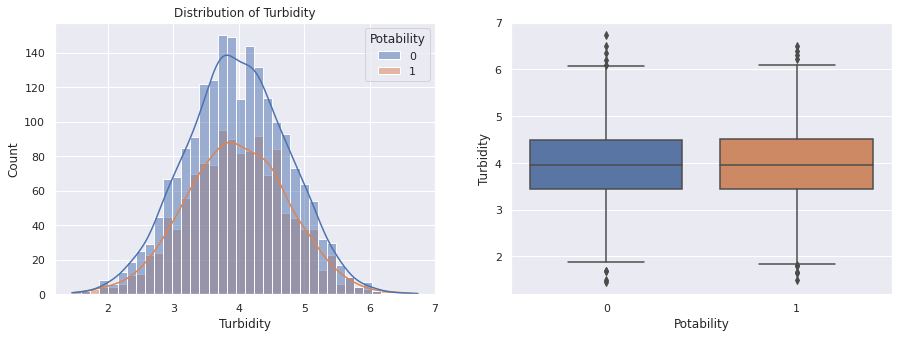

In [ ]:
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plot = sns.histplot(
    data=df,
    x='Turbidity',
    hue ='Potability',
    kde=True
).set_title('Distribution of Turbidity')

f.add_subplot(1,2,2)
sns.boxplot(x='Potability', y='Turbidity', data=df, showfliers=True)
plt.show()

In [ ]:
ks_statistic, ks_value = shapiro(df['Turbidity'])
if ks_value > 0.05 :
    print(f'P-Value : {ks_value}, We assumse data normally distributed')
else :
    print(f'P-Value : {ks_value}, We do not assumse data normally distributed ')

P-Value : 0.9306948781013489, We assumse data normally distributed


#### Removing outliers with Zscore (Turbidity)

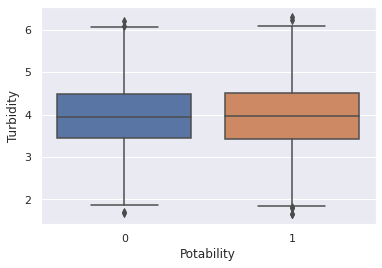

In [ ]:
#find the outliers
df['zscore'] = (df.Turbidity - df.Turbidity.mean()) / df.Turbidity.std()
# df[(df.zscore<-3) | (df.zscore>3)]


#removing outliers
df = df[(df.zscore>-3) & (df.zscore<3)]
sns.boxplot(x='Potability', y='Turbidity', data=df)
plt.show()

In [ ]:
df.groupby(['Potability'])['Turbidity'].mean()

Potability
0    3.964441
1    3.966391
Name: Turbidity, dtype: float64

**Insight** :
1. *Turbidity has a normal distribution so we using Zscore for removing outliers*
2. *the avarage of turbidity around 3,96 which means that the water is a little bit cloudy and opaque.Also there are moderate plant and animal life,so we have to reduce the turbidity* 
(*Turbidity level for drinking water is <0.5 NTU*)

### Conductivity

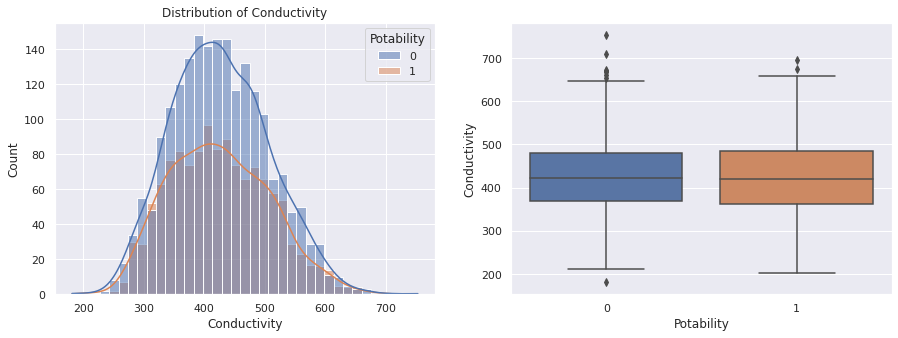

In [ ]:
f = plt.figure(figsize=(15,5))
f.add_subplot(1,2,1)
plot = sns.histplot(
    data=df,
    x='Conductivity',
    hue ='Potability',
    kde=True
).set_title('Distribution of Conductivity')

f.add_subplot(1,2,2)
sns.boxplot(x='Potability', y='Conductivity', data=df, showfliers=True)
plt.show()

In [ ]:
ks_statistic, ks_value = shapiro(df['Conductivity'])
if ks_value > 0.05 :
    print(f'P-Value : {ks_value}, We assumse data normally distributed')
else :
    print(f'P-Value : {ks_value}, We do not assumse data normally distributed ')

P-Value : 1.653180717320346e-11, We do not assumse data normally distributed 


#### Removing outliers with IQR (Conductivity)
we using IQR because Conductivity has a skewed

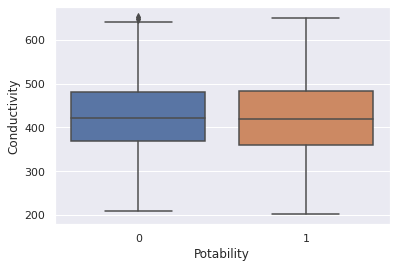

In [ ]:
Q1 = df.Conductivity.quantile(0.25)
Q3 = df.Conductivity.quantile(0.75)
IQR = Q3 - Q1
# IQR

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
# df[(df.Conductivity<lower_limit)|(df.Conductivity>upper_limit)]

df = df[(df.Conductivity>lower_limit)&(df.Conductivity<upper_limit)]
sns.boxplot(x='Potability', y='Conductivity', data=df)
plt.show()

In [ ]:
df.drop(['zscore'], axis = 1, inplace = True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,hardness_cat
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Hard
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,Moderately hard
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,Hard
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0,Hard
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Hard


In [ ]:
df.isnull().sum()

ph                 490
Hardness             0
Solids               0
Chloramines          0
Sulfate            777
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
hardness_cat         0
dtype: int64

### Spittling data

In [ ]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

SEED = 2022
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, stratify = y, random_state = SEED)
X_train.shape, y_train.shape



((2605, 10), (2605,))

In [ ]:
num_features = X.select_dtypes(np.number).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)), #knnimputer
    ('scaler', StandardScaler())]) #standarscaler

cat_features = X.select_dtypes(['object']).columns

preprocessor = ColumnTransformer(
                                transformers=[('num', numeric_transformer, num_features),
                                ('cat', OrdinalEncoder(categories=([['Soft', 'Moderately hard', 'Hard', 'Very hard']])),cat_features )],
                                remainder='passthrough')

preprocessor.fit_transform(X_train,y_train)

array([[ 1.30653202, -0.98967673, -0.19545134, ...,  1.16590625,
         0.43517921,  2.        ],
       [-0.55951387,  0.312055  ,  1.06709281, ...,  0.42347789,
         0.06490358,  2.        ],
       [ 0.72301752,  1.01260592, -0.99489959, ...,  2.34611044,
        -0.35341301,  2.        ],
       ...,
       [-0.53659458, -0.19568269,  0.68769034, ...,  0.04485267,
         2.1505522 ,  2.        ],
       [ 0.83502282, -1.03829086,  1.47169577, ...,  0.07928205,
         0.52128852,  2.        ],
       [-1.06745728, -1.43983975,  2.40058787, ...,  0.34725061,
        -0.37931762,  2.        ]])

In [ ]:
# labels = np.concatenate([num_features, cat_features])

# df_transformer = pd.DataFrame(preprocessor.transform(X_train), columns=labels)
# df_transformer.head()

### Modeling with smote

In [ ]:
SEED = 42
smote = SMOTE(random_state = SEED)

models = [
    ['logistic regression', LogisticRegression()],
    ['XgBoost', xgb.XGBClassifier(max_depth = 3)],
    ['Random Forest', RandomForestClassifier(max_depth = 3)],
    ['KNN', KNeighborsClassifier(n_neighbors = 5)],
    ['GradientBoost', GradientBoostingClassifier(max_depth = 3)]]


def evaluate(models):
    model_name=[]
    accuracy_score=[]
    recall_score=[]
    precison_score=[]
    precision_std=[]

    for name, model in models:
        estimator=Pipeline([('preprocess',preprocessor) , ('smote', smote), ('model',model)])

        skfold= StratifiedKFold(n_splits=5)

        model_name.append(name)
        accuracy_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='accuracy').mean())
        recall_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='recall').mean())
        precison_score.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='precision').mean())
        precision_std.append(cross_val_score(estimator, X_train,y_train, cv=skfold,scoring='precision').std())



    return pd.DataFrame({
        'model': model_name,
        'accuracy_score':accuracy_score,
        'recall_score':recall_score,
        'precison_score':precison_score,
        'precision_std':precision_std,
        })

In [ ]:
evaluate(models)

,model,accuracy_score,recall_score,precison_score,precision_std
0,logistic regression,0.497121,0.484773,0.385725,0.022747
1,XgBoost,0.596161,0.529986,0.483999,0.020991
2,Random Forest,0.553935,0.575220,0.444059,0.014531
3,KNN,0.604607,0.574254,0.494527,0.023512
4,GradientBoost,0.606526,0.560495,0.495795,0.027322


In [ ]:
model = xgb.XGBClassifier(max_depth=3)
estimator = Pipeline([('preprocess',preprocessor), ('smote', smote) ,('model',model)])
estimator.fit(X_train,y_train)

cf_matrix_smote = confusion_matrix(y_test, estimator.predict(X_test))
print(f'XgBoost with SMOTE {precision_score(y_test, estimator.predict(X_test))}')
print(cf_matrix_smote)


XgBoost with SMOTE 0.4785714285714286
[[252 146]
 [120 134]]


## **Final analysis**

### Hyperparamter tuning Xgboost

For scoring gridsearchcv we using fbeta_score with beta = 0.5.
because we will analyze the percentage of potability water which are relevant.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html

In [ ]:
f_half_scorer = make_scorer(fbeta_score, beta=0.5)

SEED = 42
smote = SMOTE(random_state = SEED)
estimator=Pipeline([('preprocess',preprocessor) ,('smote', smote), ('model',xgb.XGBClassifier())])
# skfold= StratifiedKFold(n_splits=5)

hyperparam = {'model__learning_rate' : [0.01,0.1,0.3],
              'model__min_samples_leaf' : [3,5,10],
              'model__max_depth': [3,5,10],
              'model__n_estimators':[100,300,500],
              'model__tree_method':['auto','hist','gpu_hist']} 

grid = GridSearchCV(estimator, param_grid = hyperparam, cv = 5, scoring=f_half_scorer, n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(X_train,y_train) 

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,
                                                                                                     copy=True,
                                     

In [ ]:
grid.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 10,
 'model__min_samples_leaf': 3,
 'model__n_estimators': 300,
 'model__tree_method': 'hist'}

In [ ]:
 grid.best_score_ 

0.5322462490871628

In [ ]:
grid.best_estimator_.fit(X_train,y_train)
#f_half_scorer(grid.best_estimator_, X_test, y_test)
fbeta_score(y_test,grid.best_estimator_.predict(X_test),0.5)

0.5184534270650263

In [ ]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       398
           1       0.53      0.46      0.50       254

    accuracy                           0.63       652
   macro avg       0.61      0.60      0.60       652
weighted avg       0.63      0.63      0.63       652



### **Model Before And After Tuning**

In [ ]:
Xgb = xgb.XGBClassifier(n_estimators= 100,min_samples_leaf = 5, max_depth= 5, tree_method = 'auto',learning_rate= 0.01)
xgb2 = xgb.XGBClassifier(n_estimators= 300,min_samples_leaf = 3, max_depth= 10, tree_method = 'hist',learning_rate= 0.1)

In [ ]:
def final_eval(model):
    y_pred = model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())
    print(fbeta_score(y_test,y_pred,0.5))

In [ ]:
print('Score before tuning =',end=' ')
final_eval(Xgb)
print('-----------------------------------------')
print('Score after tuning =',end=' ')
final_eval(xgb2)

Score before tuning = 0.3947368421052631
-----------------------------------------
Score after tuning = 0.5263157894736842


It has a quite significant score increases after model tuning

### **Feature Importance**

In [ ]:
df_feature = pd.DataFrame({
    'importance':xgb2.feature_importances_},
    index = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
).sort_values('importance', ascending =False) #[:14].plot(kind ='barh')
df_feature

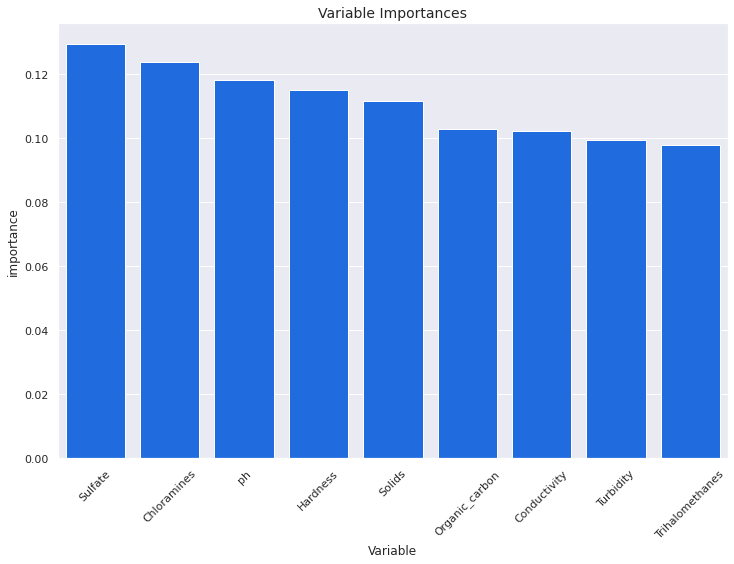

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.ylabel('Importance',size = 12); plt.xlabel('Variable',size = 12); plt.title('Variable Importances',size = 14);
sns.barplot(data = df_feature,x = df_feature.index, y = df_feature['importance'], color='#0066ff' )
sns.color_palette("Blues", as_cmap=True)

Each variable has a quite high value of importance and specify the dependencies to the potability variable. But not every high score varible clarify that water is potable.  

## **Final Analisis**

*From the exploratory data analysis,notice that water potability and non-potability have values ​​that are not so different and ,for each feature, there is noise and outliers. Ph, sulfate and trihalomethane have many missing values.so we tried to fix it with the knn imputer (n_neighbors = 5).and for imbalance dataset we using Synthetic Minority Oversampling Technique (SMOTE)*


*Furthermore, the dataset has very high values of impurity, so our model will be an incorrect predictor for water potability.*